In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


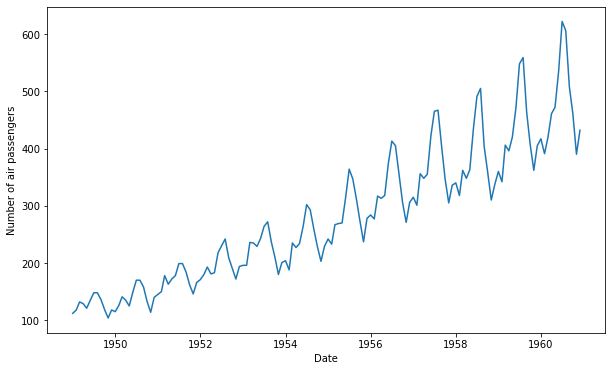

In [4]:
# plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [5]:
# Determining rolling statistics
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


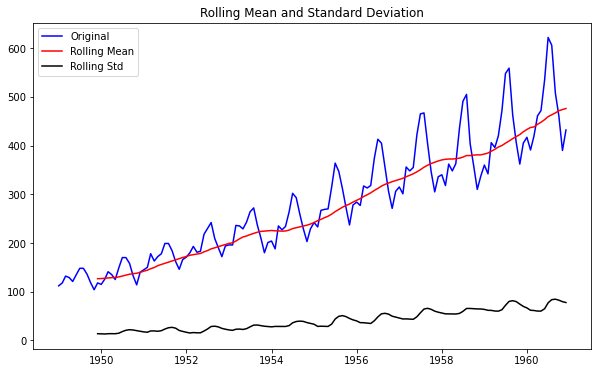

In [6]:
#plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block = False)

In [7]:
#performing Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Result of ADF test: ')
dftest = adfuller(indexedDataset['#Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Result of ADF test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


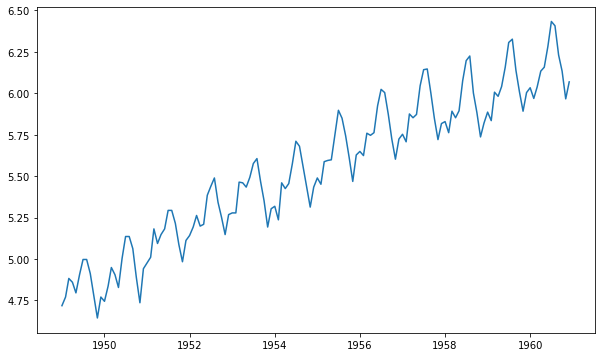

In [8]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

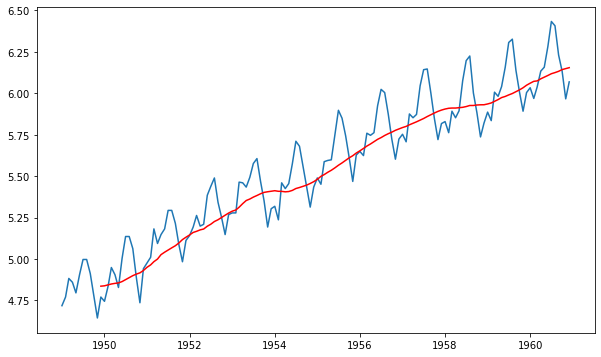

In [9]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingSTD = indexedDataset_logScale.rolling(window = 12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [11]:
#remove NaN
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [12]:
def test_stationarity(timeseries):
    
    #determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False) 
    
    #performing Augmented Dickey-Fuller test
    print('Result of ADF test: ')
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

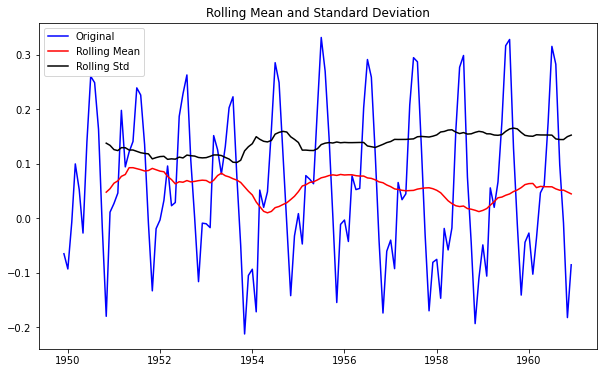

Result of ADF test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [13]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [14]:
datasetLogScaleMinusMovingAverage

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


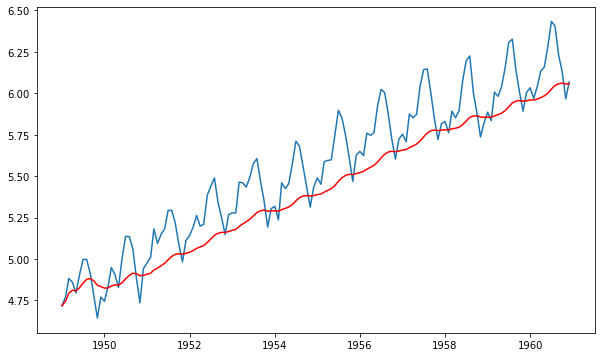

In [15]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

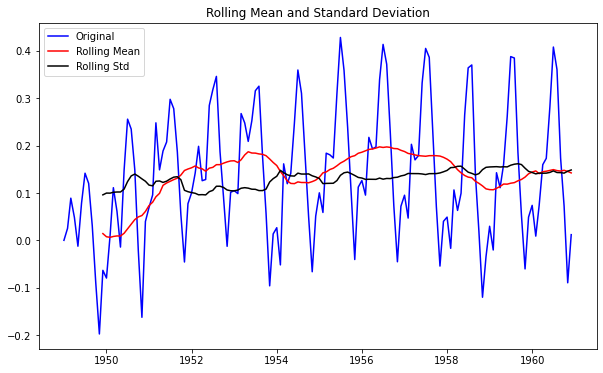

Result of ADF test: 
Test Statistic                  -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

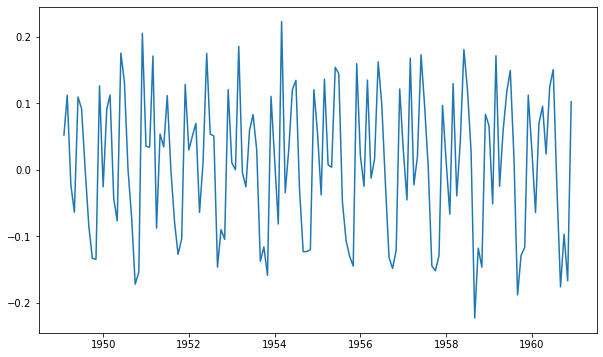

In [17]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

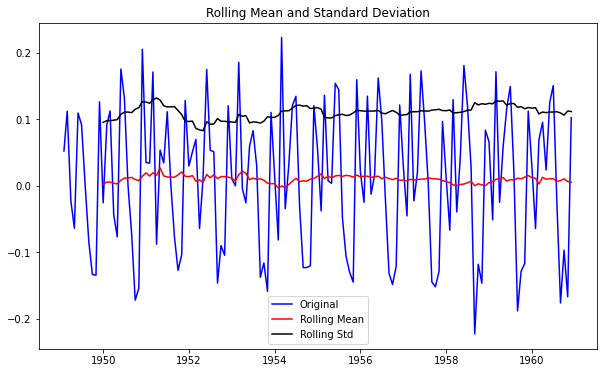

Result of ADF test: 
Test Statistic                  -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

In [19]:
datasetLogDiffShifting

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


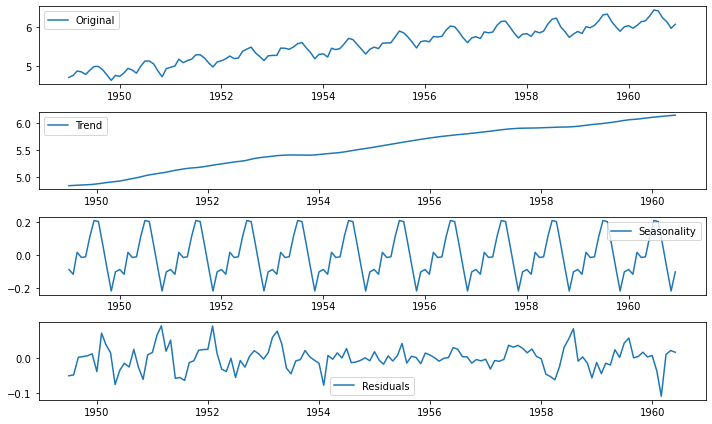

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()

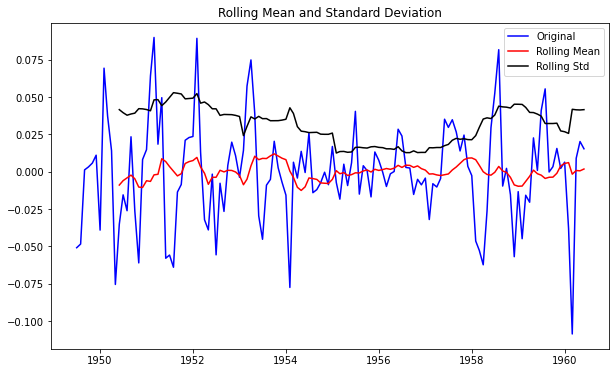

Result of ADF test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [21]:
decomposedLogdata = residual.to_frame(name = '#Passengers')
decomposedLogdata.dropna(inplace = True)
test_stationarity(decomposedLogdata)

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


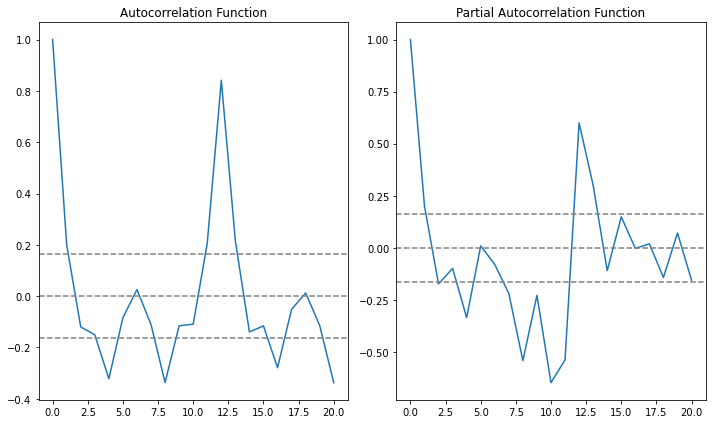

In [22]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

#ACF plot
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.title('Autocorrelation Function')

#PACF plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequ

Plotting AR model


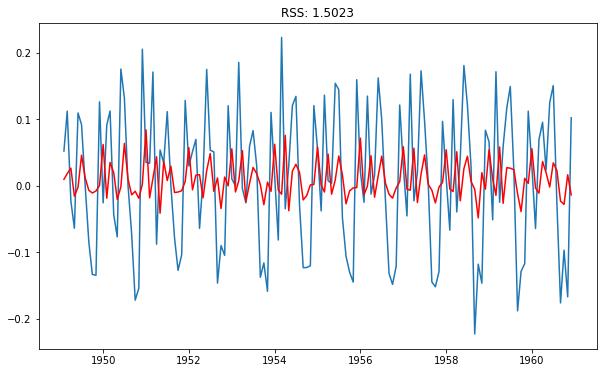

In [23]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (2, 1, 0))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

print('Plotting AR model')

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


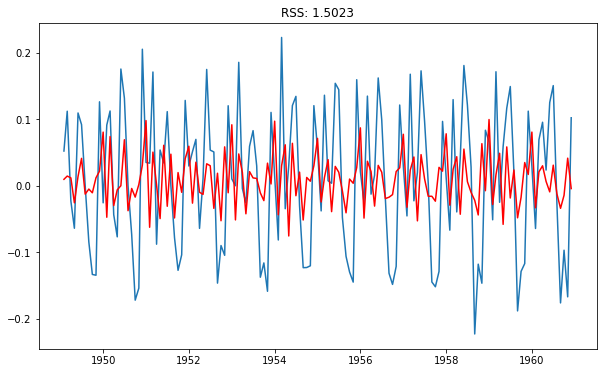

In [24]:
#MA Model
model = ARIMA(indexedDataset_logScale, order = (0, 1, 2))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

print('Plotting MA model')

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


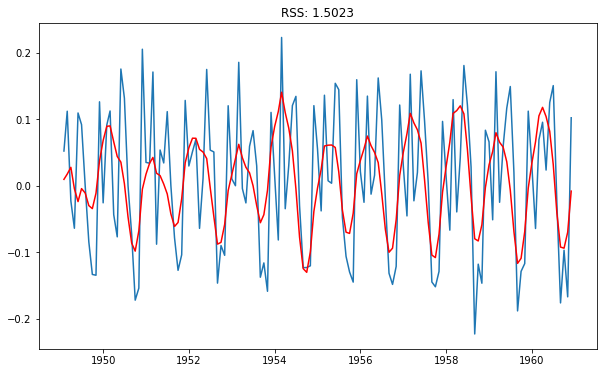

In [25]:
#ARIMA Model
model = ARIMA(indexedDataset_logScale, order = (2, 1, 2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

print('Plotting AR model')

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [27]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372552
1960-09-01    1.280202
1960-10-01    1.186189
1960-11-01    1.116265
1960-12-01    1.108138
Length: 143, dtype: float64

In [28]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'][0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
                ...   
1960-08-01    6.091051
1960-09-01    5.998701
1960-10-01    5.904688
1960-11-01    5.834764
1960-12-01    5.826637
Length: 144, dtype: float64

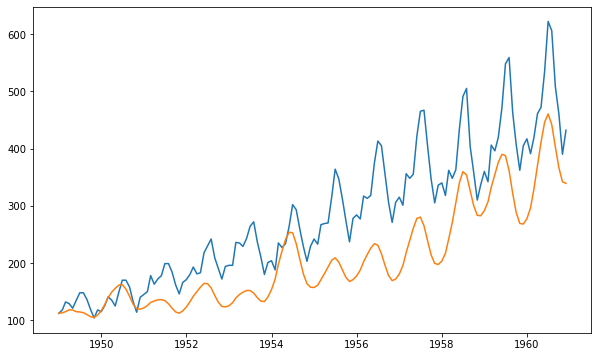

In [29]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [30]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


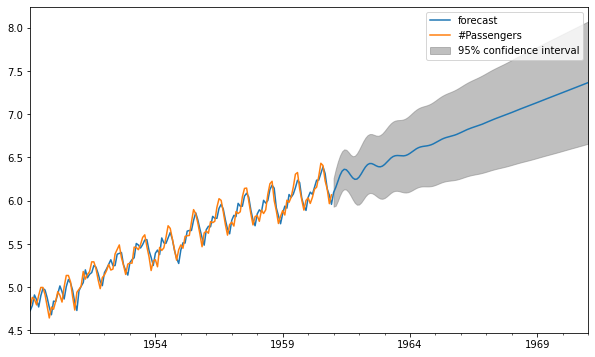

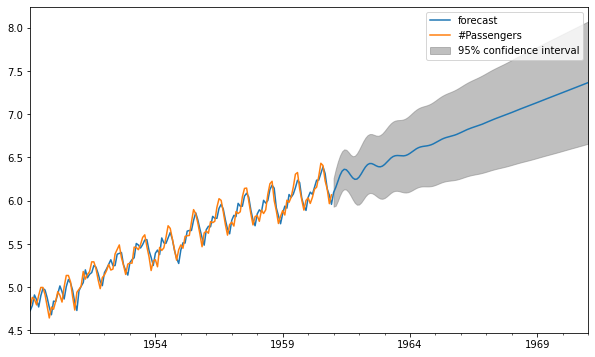

In [33]:
results_ARIMA.plot_predict(1,264)

In [34]:
x = results_ARIMA.forecast(steps = 120)
x

(array([6.09553386, 6.15281392, 6.22442954, 6.29241091, 6.3416471 ,
        6.36359359, 6.35784688, 6.33139309, 6.29597546, 6.26447718,
        6.24738327, 6.25025169, 6.27275829, 6.30940301, 6.3515148 ,
        6.38988642, 6.41727369, 6.43011044, 6.42906682, 6.41842483,
        6.4045615 , 6.3940361 , 6.39183076, 6.40019494, 6.4183368 ,
        6.44295393, 6.4693742 , 6.4929397 , 6.51024103, 6.51989018,
        6.52267564, 6.52112374, 6.51864514, 6.51853676, 6.52311908,
        6.53322345, 6.54812853, 6.56591539, 6.58410289, 6.60036519,
        6.61313246, 6.6219276 , 6.62737768, 6.63093109, 6.63438669,
        6.63937965, 6.64696484, 6.65739819, 6.67015302, 6.68414228,
        6.69806602, 6.71077876, 6.72157706, 6.73033958, 6.73749785,
        6.74386352, 6.75037297, 6.75782566, 6.76668655, 6.77699796,
        6.78841291, 6.80032825, 6.81207165, 6.82308729, 6.83307105,
        6.84202461, 6.8502228 , 6.85811189, 6.86617308, 6.87479119,
        6.8841627 , 6.89426351, 6.90487855, 6.91

In [35]:
x[1]

array([0.08384711, 0.1074946 , 0.11568692, 0.11702772, 0.11703494,
       0.11744014, 0.11762246, 0.1177871 , 0.12024161, 0.12736042,
       0.1387096 , 0.15118793, 0.16157814, 0.16834394, 0.17177328,
       0.17311981, 0.17358731, 0.17385458, 0.17430217, 0.17543331,
       0.17788147, 0.18195723, 0.18726218, 0.19283394, 0.19769246,
       0.20130641, 0.20369057, 0.20519834, 0.2062527 , 0.20721   ,
       0.20836973, 0.21000329, 0.21229747, 0.21524481, 0.21860182,
       0.2219826 , 0.22503068, 0.22755298, 0.2295481 , 0.23114801,
       0.23253829, 0.23390538, 0.23541314, 0.23718316, 0.23926542,
       0.24161542, 0.24410376, 0.24656362, 0.24885261, 0.25089634,
       0.25269738, 0.25431633, 0.25584317, 0.25737233, 0.25898395,
       0.26072855, 0.26261554, 0.26461095, 0.26664904, 0.26865487,
       0.27056855, 0.27236103, 0.27403708, 0.2756278 , 0.27717836,
       0.27873533, 0.28033598, 0.28200025, 0.28372689, 0.28549517,
       0.28727218, 0.28902352, 0.29072344, 0.2923609 , 0.29394

In [36]:
len(x[1])

120

In [37]:
np.exp(x[1])

array([1.08746262, 1.11348485, 1.12264434, 1.12415059, 1.1241587 ,
       1.12461431, 1.12481937, 1.12500457, 1.12776929, 1.13582631,
       1.14879044, 1.16321524, 1.1753643 , 1.18334354, 1.1874086 ,
       1.18900856, 1.18956455, 1.18988252, 1.19041522, 1.19176251,
       1.19468371, 1.19956289, 1.20594342, 1.2126814 , 1.21858757,
       1.22299945, 1.22591875, 1.22776855, 1.22906375, 1.2302409 ,
       1.23166847, 1.23368212, 1.23651565, 1.24016547, 1.24433571,
       1.24854965, 1.25236114, 1.25552396, 1.25803138, 1.26004573,
       1.26179876, 1.26352493, 1.26543146, 1.26767328, 1.27031566,
       1.27330442, 1.27647677, 1.27962059, 1.28255298, 1.28517686,
       1.2874936 , 1.28957967, 1.29155016, 1.29352666, 1.29561302,
       1.29787532, 1.3003267 , 1.30292398, 1.30558216, 1.30820356,
       1.31070944, 1.31306097, 1.31526357, 1.31735746, 1.31940168,
       1.32145755, 1.32357443, 1.32577905, 1.32807018, 1.33042065,
       1.33278692, 1.33512314, 1.33739467, 1.33958639, 1.34170